<a href="https://colab.research.google.com/github/kabir-hasnain/DeepLearning/blob/main/Final_Version_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Splitter and Split Original Folder Into Training, Testing, Validation

In [1]:
! pip install python_splitter
import python_splitter
python_splitter.split_from_folder("/kaggle/input/rice-leaf-disease-dataset-bangladesh/Rice leaf disease dataset-Bangladesh", train=0.7, val=0.2, test=0.1)

✅Checking SOURCE directory...
0.7 0.2 0.1
✅Checking percentage validation...
✅Making required directories...
✅Shuffling data...
✅Getting ready for copying files...

-------------Successfully splitted !!!--------------- 


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("/kaggle/working/Train_Test_Folder")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['test', 'train', 'val']

In [3]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Sheath Blight"))

189

In [4]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Bacterial Leaf Blight"))

125

In [5]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Narrow Brown Leaf Spot"))

81

In [6]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Leaf scald"))

132

In [7]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Leaf Blast"))

213

In [8]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Rice Hispa"))

150

In [9]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Brown Spot"))

186

In [10]:
len(os.listdir("/kaggle/working/Train_Test_Folder/train/Healthy Rice Leaf"))

109

# Visualize Number of Images For Each Class In Tran, Test, Val Folders.

In [11]:
train_dir = "/kaggle/working/Train_Test_Folder/train"
test_dir = "/kaggle/working/Train_Test_Folder/test"
val_dir = "/kaggle/working/Train_Test_Folder/val"

print("Train set:\n========================================")
num_SheathBlight = len(os.listdir(os.path.join(train_dir, 'Sheath Blight')))
num_BacterialLeafBlight = len(os.listdir(os.path.join(train_dir, 'Bacterial Leaf Blight')))
num_NarrowBrownLeafSpot = len(os.listdir(os.path.join(train_dir, 'Narrow Brown Leaf Spot')))
num_Leafscald = len(os.listdir(os.path.join(train_dir, 'Leaf scald')))
num_LeafBlast = len(os.listdir(os.path.join(train_dir, 'Leaf Blast')))
num_RiceHispa = len(os.listdir(os.path.join(train_dir, 'Rice Hispa')))
num_BrownSpot = len(os.listdir(os.path.join(train_dir, 'Brown Spot')))
num_HealthyRiceLeaf = len(os.listdir(os.path.join(train_dir, 'Healthy Rice Leaf')))


print(f"Sheath Blight={num_SheathBlight}")
print(f"Bacterial Leaf Blight={num_BacterialLeafBlight}")
print(f"Narrow Brown Leaf Spot={num_NarrowBrownLeafSpot}")
print(f"Leaf scald={num_Leafscald}")
print(f"Leaf Blast={num_LeafBlast}")
print(f"Rice Hispa={num_RiceHispa}")
print(f"Brown Spot={num_BrownSpot}")
print(f"Healthy Rice Leaf={num_HealthyRiceLeaf}")

print("Test set:\n========================================")
num_SheathBlight = len(os.listdir(os.path.join(test_dir, 'Sheath Blight')))
num_BacterialLeafBlight = len(os.listdir(os.path.join(test_dir, 'Bacterial Leaf Blight')))
num_NarrowBrownLeafSpot = len(os.listdir(os.path.join(test_dir, 'Narrow Brown Leaf Spot')))
num_Leafscald = len(os.listdir(os.path.join(test_dir, 'Leaf scald')))
num_LeafBlast = len(os.listdir(os.path.join(test_dir, 'Leaf Blast')))
num_RiceHispa = len(os.listdir(os.path.join(test_dir, 'Rice Hispa')))
num_BrownSpot = len(os.listdir(os.path.join(test_dir, 'Brown Spot')))
num_HealthyRiceLeaf = len(os.listdir(os.path.join(test_dir, 'Healthy Rice Leaf')))

print(f"Sheath Blight={num_SheathBlight}")
print(f"Bacterial Leaf Blight={num_BacterialLeafBlight}")
print(f"Narrow Brown Leaf Spot={num_NarrowBrownLeafSpot}")
print(f"Leaf scald={num_Leafscald}")
print(f"Leaf Blast={num_LeafBlast}")
print(f"Rice Hispa={num_RiceHispa}")
print(f"Brown Spot={num_BrownSpot}")
print(f"Healthy Rice Leaf={num_HealthyRiceLeaf}")

print("Validation set:\n========================================")
num_SheathBlight = len(os.listdir(os.path.join(val_dir, 'Sheath Blight')))
num_BacterialLeafBlight = len(os.listdir(os.path.join(val_dir, 'Bacterial Leaf Blight')))
num_NarrowBrownLeafSpot = len(os.listdir(os.path.join(val_dir, 'Narrow Brown Leaf Spot')))
num_Leafscald = len(os.listdir(os.path.join(val_dir, 'Leaf scald')))
num_LeafBlast = len(os.listdir(os.path.join(val_dir, 'Leaf Blast')))
num_RiceHispa = len(os.listdir(os.path.join(val_dir, 'Rice Hispa')))
num_BrownSpot = len(os.listdir(os.path.join(val_dir, 'Brown Spot')))
num_HealthyRiceLeaf = len(os.listdir(os.path.join(val_dir, 'Healthy Rice Leaf')))

print(f"Sheath Blight={num_SheathBlight}")
print(f"Bacterial Leaf Blight={num_BacterialLeafBlight}")
print(f"Narrow Brown Leaf Spot={num_NarrowBrownLeafSpot}")
print(f"Leaf scald={num_Leafscald}")
print(f"Leaf Blast={num_LeafBlast}")
print(f"Rice Hispa={num_RiceHispa}")
print(f"Brown Spot={num_BrownSpot}")
print(f"Healthy Rice Leaf={num_HealthyRiceLeaf}")

# duckweeds = os.listdir("/kaggle/working/Train_Test_Folder/train/Common Duckweeds (Lemna minor)")
# duckweeds_dir = "/kaggle/working/Train_Test_Folder/train/Common Duckweeds (Lemna minor)"

# plt.figure(figsize=(20, 10))

# for i in range(9):
#     plt.subplot(3, 3, i + 1)
#     img = plt.imread(os.path.join(duckweeds_dir, duckweeds[i]))
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')

# plt.tight_layout()

Train set:
Sheath Blight=189
Bacterial Leaf Blight=125
Narrow Brown Leaf Spot=81
Leaf scald=132
Leaf Blast=213
Rice Hispa=150
Brown Spot=186
Healthy Rice Leaf=109
Test set:
Sheath Blight=55
Bacterial Leaf Blight=36
Narrow Brown Leaf Spot=24
Leaf scald=38
Leaf Blast=62
Rice Hispa=44
Brown Spot=54
Healthy Rice Leaf=32
Validation set:
Sheath Blight=27
Bacterial Leaf Blight=19
Narrow Brown Leaf Spot=12
Leaf scald=19
Leaf Blast=30
Rice Hispa=21
Brown Spot=27
Healthy Rice Leaf=16


***Visualize one of the image to understand the pixel value distribution***

The dimensions of the image are 1200 pixels width and 1600 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 106.3569 and the standard deviation is 49.5825


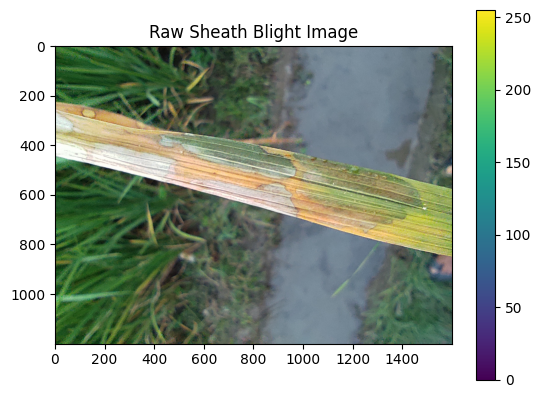

In [12]:
SheathBlight_img = os.listdir("/kaggle/working/Train_Test_Folder/train/Sheath Blight")[8]
SheathBlight_dir = "/kaggle/working/Train_Test_Folder/train/Sheath Blight"
sample_img = plt.imread(os.path.join(SheathBlight_dir, SheathBlight_img))
plt.imshow(sample_img)
plt.colorbar()
plt.title('Raw Sheath Blight Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# Train, Valid, Test Generator For Deep Learning Model

In [13]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator()

In [14]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=32,
                                            shuffle=True,
                                            class_mode='categorical',
                                            target_size=(224, 224))

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=32,
                                                shuffle=False,
                                                class_mode='categorical',
                                                target_size=(224, 224))
test = image_generator.flow_from_directory(test_dir,
                                            batch_size=32,
                                            shuffle=False,
                                            class_mode='categorical',
                                            target_size=(224, 224))

Found 1185 images belonging to 8 classes.
Found 171 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [15]:
class_indices = train.class_indices

# class_indices is a dictionary with class names as keys and their corresponding numerical labels as values
# Example: {'class_name_1': 0, 'class_name_2': 1, 'class_name_3': 2, 'class_name_4': 3}

# To reverse the dictionary, you can create a mapping from numerical labels to class names
class_labels = {v: k for k, v in class_indices.items()}

# Now you can access class names using numerical labels
print(class_labels[0])  # This will give you the corresponding class name for label 0
print(class_labels[1])  # This will give you the corresponding class name for label 1
print(class_labels[2])  # This will give you the corresponding class name for label 2
print(class_labels[3])  # This will give you the corresponding class name for label 3
print(class_labels[4])  # This will give you the corresponding class name for label 4
print(class_labels[5])  # This will give you the corresponding class name for label 5
print(class_labels[6])  # This will give you the corresponding class name for label 6
print(class_labels[7])  # This will give you the corresponding class name for label 7

Bacterial Leaf Blight
Brown Spot
Healthy Rice Leaf
Leaf Blast
Leaf scald
Narrow Brown Leaf Spot
Rice Hispa
Sheath Blight


# DenseNet201

In [16]:
from tensorflow.keras.applications import ResNet50, DenseNet201,InceptionV3,VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax

In [17]:
# # Define the input shape
# input_shape = (224, 224, 3)
# input_tensor = Input(shape=input_shape)

# # Load the pre-trained DenseNet201 model
# DenseNet201_model = DenseNet201(include_top=False, weights='imagenet', input_tensor=input_tensor)

# # Freeze the layers in the base model
# for layer in DenseNet201_model.layers:
#     layer.trainable = False

# # Add global average pooling layer
# x = GlobalAveragePooling2D()(DenseNet201_model.output)

# # Batch Normalization
# x = BatchNormalization()(x)

# # Add a fully connected layer with 512 units
# x = Dense(512, activation='relu')(x)

# # Add a dropout layer
# x = Dropout(0.4)(x)

# # Add another fully connected layer with 256 units
# x = Dense(256, activation='relu')(x)

# # Add another dropout layer
# x = Dropout(0.4)(x)

# # Add the output layer with 4 units for classification (adjust as needed)
# output = Dense(4, activation='softmax')(x)

# # Create the model
# model = Model(inputs=input_tensor, outputs=output)

# # Print model summary
# model.summary()



#--------------------
# Define the input shape
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape)

# Load the pre-trained DenseNet201 model
VGG16_model = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

# Freeze the layers in the base model
for layer in VGG16_model.layers:
    layer.trainable = False

# Add global average pooling layer
x = GlobalAveragePooling2D()(VGG16_model.output)

# Batch Normalization
x = BatchNormalization()(x)

# Add a fully connected layer with 512 units
x = Dense(1024, activation='relu')(x)

# Add a dropout layer
x = Dropout(0.2)(x)

# Add the output layer with 8 units for classification (adjust as needed)
output = Dense(8, activation='softmax')(x)
# # Example output layer for 8 classes
# model.add(Dense(8, activation='softmax'))

# Create the model
model = Model(inputs=input_tensor, outputs=output)

# Print model summary
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

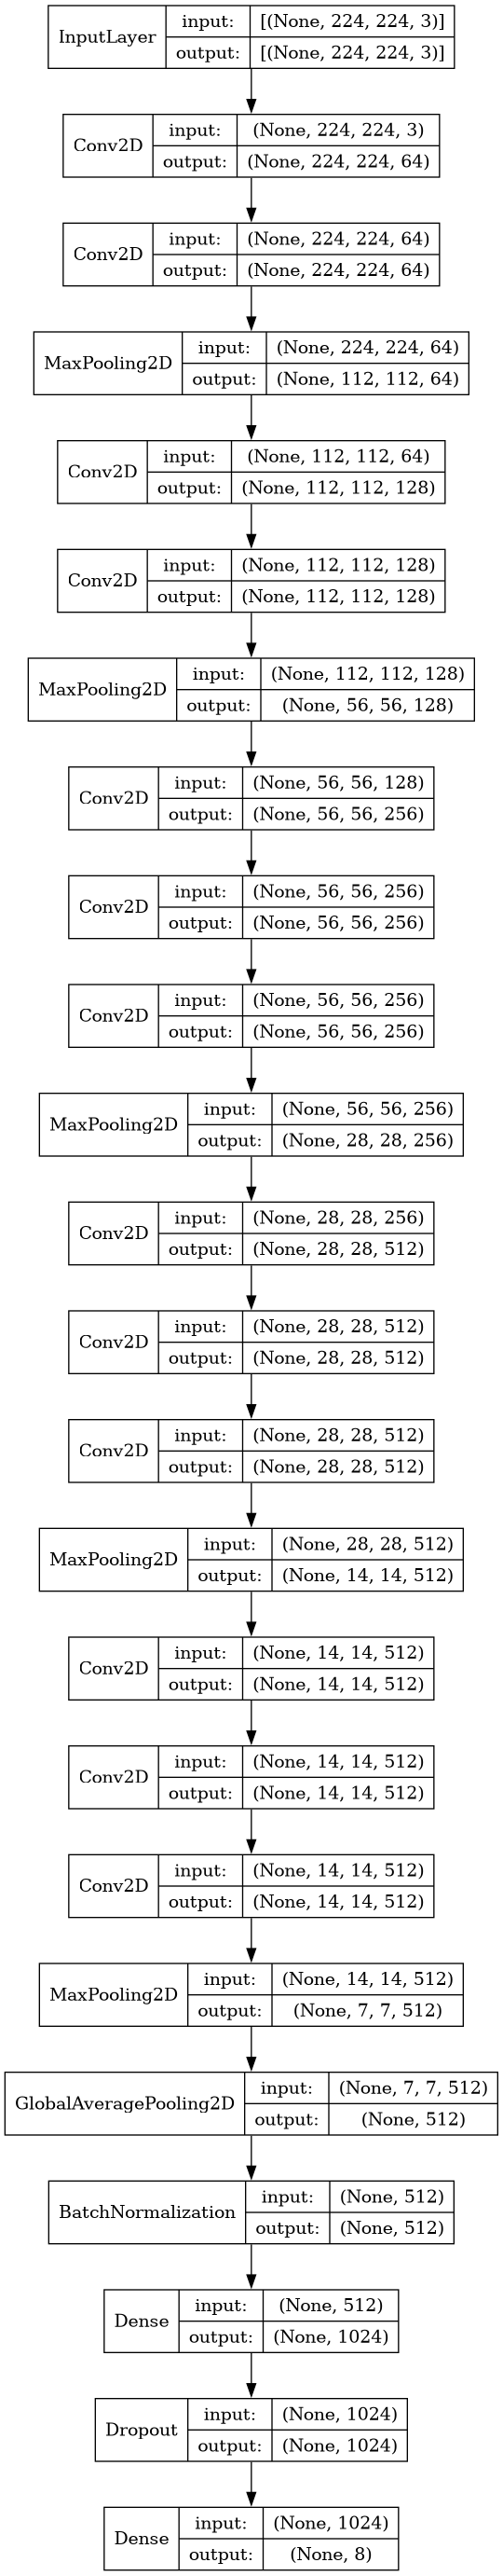

In [18]:
from tensorflow.keras.utils import plot_model

# Assuming you already have a model defined and compiled

# Generate a simplified model summary
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
model_summary = "\n".join(model_summary)

# Save the model summary as text
with open("vgg16_model_summary.txt", "w") as text_file:
    text_file.write(model_summary)

# Plot the model architecture and save it as an image
plot_model(model, to_file="vgg16_model_summary.png", show_shapes=True, show_layer_names=False)

In [19]:
layers = model.layers
print(f"The model has {len(layers)} layers")

The model has 24 layers


In [20]:
print(f"The input shape {model.input}")
print(f"The output shape {model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [21]:
# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train, validation_data=validation, steps_per_epoch=len(train), epochs=20)

Epoch 1/20
38/38 [==============================] - 41s 773ms/step - loss: 1.5496 - accuracy: 0.4785 - val_loss: 1.2535 - val_accuracy: 0.6199
Epoch 2/20
38/38 [==============================] - 27s 740ms/step - loss: 0.7513 - accuracy: 0.7755 - val_loss: 1.0329 - val_accuracy: 0.7135
Epoch 3/20
38/38 [==============================] - 27s 717ms/step - loss: 0.5192 - accuracy: 0.8700 - val_loss: 0.9394 - val_accuracy: 0.7193
Epoch 4/20
38/38 [==============================] - 27s 703ms/step - loss: 0.3937 - accuracy: 0.9080 - val_loss: 0.8610 - val_accuracy: 0.7661
Epoch 5/20
38/38 [==============================] - 27s 721ms/step - loss: 0.3218 - accuracy: 0.9409 - val_loss: 0.8519 - val_accuracy: 0.7544
Epoch 6/20
38/38 [==============================] - 27s 709ms/step - loss: 0.2630 - accuracy: 0.9553 - val_loss: 0.8228 - val_accuracy: 0.7661
Epoch 7/20
38/38 [==============================] - 27s 709ms/step - loss: 0.2174 - accuracy: 0.9654 - val_loss: 0.7923 - val_accuracy: 0.7661

In [23]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.to_csv('Vgg16_training_history.csv', index=False)

# Model Evaluation (Accuracy & Loss Plot, Test Results, Classification Report, Confusion Matrix)

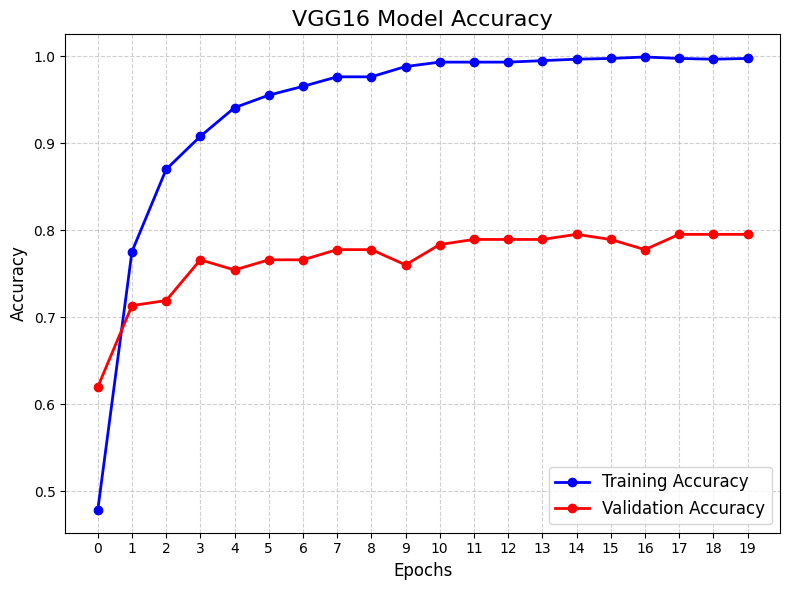

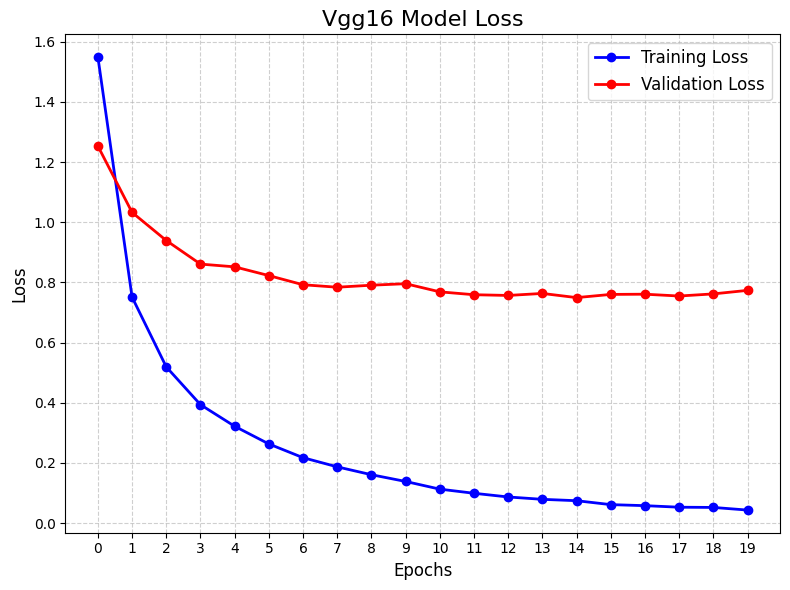

In [24]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# --------------Model Accuracy-----------#

# Plot training accuracy with a solid blue line and validation accuracy with a solid red line
plt.plot(history.history['accuracy'], label='Training Accuracy', color='b', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r', linewidth=2, marker='o')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set the title, labels, and legend
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)

# Customize the x and y axis tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a shadow and a legend title
plt.legend(fontsize=12, loc='lower right')
plt.gca().set_title('VGG16 Model Accuracy', fontsize=16)

# Customize the X-axis tick locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Set integer X-axis tick locator
ax.set_xticks(np.arange(0, len(history.history['accuracy'])))  # Set ticks at all integer positions

# Adjust figure size (optional)
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Save the figure in high resolution (e.g., 300 DPI) as a PNG file
fig.savefig('Vgg16_accuracy_plot.png', dpi=1000, bbox_inches='tight')

# Show or save the plot
plt.tight_layout()
plt.show()


# ------------------------- Model Loss ---------------#

# Assuming you have already defined the 'history' variable containing accuracy data
# fig1 = plt.gcf()

# Plot training accuracy with a solid blue line and validation accuracy with a solid red line
plt.plot(history.history['loss'], label='Training Loss', color='b', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='r', linewidth=2, marker='o')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set the title, labels, and legend
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)

# Customize the x and y axis tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend with a shadow and a legend title
plt.legend(fontsize=12, loc='upper right')
plt.gca().set_title('Vgg16 Model Loss', fontsize=16)

# Customize the X-axis tick locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Set integer X-axis tick locator
ax.set_xticks(np.arange(0, len(history.history['loss'])))  # Set ticks at all integer positions

# Adjust figure size (optional)
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Save the figure in high resolution (e.g., 300 DPI) as a PNG file
fig.savefig('vgg16_loss_plot.png', dpi=1000, bbox_inches='tight')

# Show or save the plot
plt.tight_layout()
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

evaluation1 = model.evaluate(train)
print(f"VGG16 Train Accuracy: {evaluation1[1] * 100:.2f}%")

evaluation2 = model.evaluate(validation)
print(f"VGG16 Validation Accuracy: {evaluation2[1] * 100:.2f}%")

evaluation3 = model.evaluate(test)
print(f"VGG16 Test Accuracy: {evaluation3[1] * 100:.2f}%")

38/38 [==============================] - 24s 617ms/step - loss: 0.0210 - accuracy: 1.0000
VGG16 Train Accuracy: 100.00%
6/6 [==============================] - 4s 607ms/step - loss: 0.7736 - accuracy: 0.7953
VGG16 Validation Accuracy: 79.53%
11/11 [==============================] - 11s 998ms/step - loss: 0.6625 - accuracy: 0.7971
VGG16 Test Accuracy: 79.71%


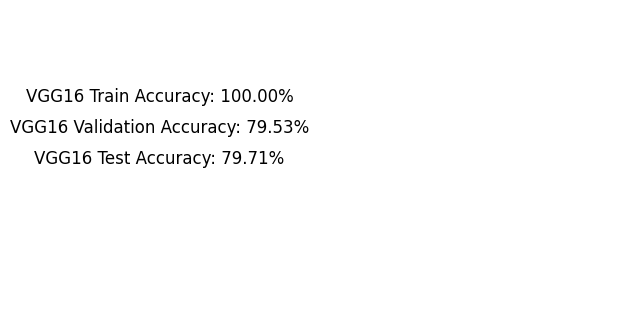

In [26]:
# Your evaluation code here
train_accuracy = evaluation1[1] * 100
validation_accuracy = evaluation2[1] * 100
test_accuracy = evaluation3[1] * 100

# Create a text image
plt.figure(figsize=(6, 4))
plt.text(0.0, 0.7, f"VGG16 Train Accuracy: {train_accuracy:.2f}%", fontsize=12, ha='center')
plt.text(0.0, 0.6, f"VGG16 Validation Accuracy: {validation_accuracy:.2f}%", fontsize=12, ha='center')
plt.text(0.0, 0.5, f"VGG16 Test Accuracy: {test_accuracy:.2f}%", fontsize=12, ha='center')
plt.axis('off')

# Save the image
plt.savefig('vgg16_evaluation_results.png', format='png', bbox_inches='tight', dpi=1000)


In [27]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd


# Create a dictionary that maps class indices to class names
class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot',
               3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names



predicted_vals = model.predict(test, steps=len(test))
predicted_labels = np.argmax(predicted_vals, axis=1)

# Convert class indices to class names
predicted_class_names = [class_names[i] for i in predicted_labels]

# Create a classification report using class names
report = classification_report([class_names[i] for i in test.classes], predicted_class_names, output_dict=True)

# Display the classification report as a DataFrame
df = pd.DataFrame(report)
print("VGG16 Classification Report:")
print('\n\n')
print(df)

11/11 [==============================] - 7s 565ms/step
VGG16 Classification Report:



           Bacterial Leaf Blight  Brown Spot  Healthy Rice Leaf  Leaf Blast  \
precision                0.87037    0.770833           0.836364    0.763158   
recall                   0.87037    0.840909           0.836364    0.763158   
f1-score                 0.87037    0.804348           0.836364    0.763158   
support                 54.00000   44.000000          55.000000   38.000000   

           Leaf scald  Narrow Brown Leaf Spot  Rice Hispa  Sheath Blight  \
precision    0.760563                0.727273    0.866667       0.806452   
recall       0.870968                0.750000    0.541667       0.694444   
f1-score     0.812030                0.738462    0.666667       0.746269   
support     62.000000               32.000000   24.000000      36.000000   

           accuracy   macro avg  weighted avg  
precision  0.797101    0.800210      0.800512  
recall     0.797101    0.770985      0.7

11/11 [==============================] - 6s 572ms/step


<Figure size 800x600 with 0 Axes>

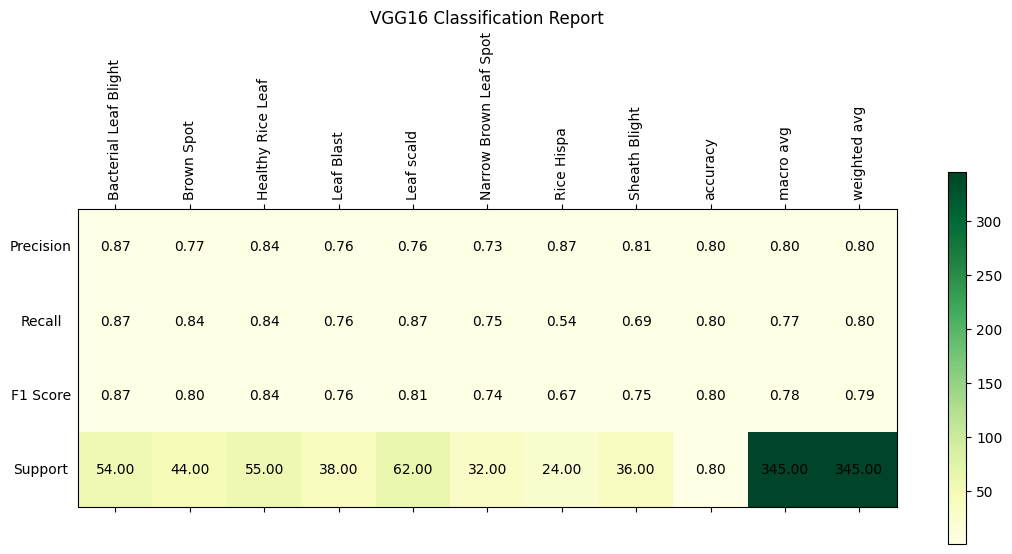

In [28]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary that maps class indices to class names
class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot', 3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names

predicted_vals = model.predict(test, steps=len(test))
predicted_labels = np.argmax(predicted_vals, axis=1)

# Convert class indices to class names
predicted_class_names = [class_names[i] for i in predicted_labels]

# Create a classification report using class names
report = classification_report([class_names[i] for i in test.classes], predicted_class_names, output_dict=True)
report_df = pd.DataFrame(report)

# Create a heatmap from the DataFrame
plt.figure(figsize=(8, 6))
cax = plt.matshow(report_df, cmap='YlGn', interpolation='nearest')
plt.title('VGG16 Classification Report')

# Display the values on the heatmap with annotations
for i in range(report_df.shape[0]):
    for j in range(report_df.shape[1]):
        plt.text(j, i, f"{report_df.iloc[i, j]:.2f}", va='center', ha='center', color='k')

# Add labels for precision, recall, and F1 Score
plt.text(-1, 0, 'Precision', va='center', ha='center', color='k')
plt.text(-1, 1, 'Recall', va='center', ha='center', color='k')
plt.text(-1, 2, 'F1 Score', va='center', ha='center', color='k')
plt.text(-1, 3, 'Support', va='center', ha='center', color='k')

plt.colorbar(cax)
plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=90)
plt.yticks([])

# Save the image
plt.savefig('vgg16_classification_report.png', format='png', bbox_inches='tight', dpi=1000)

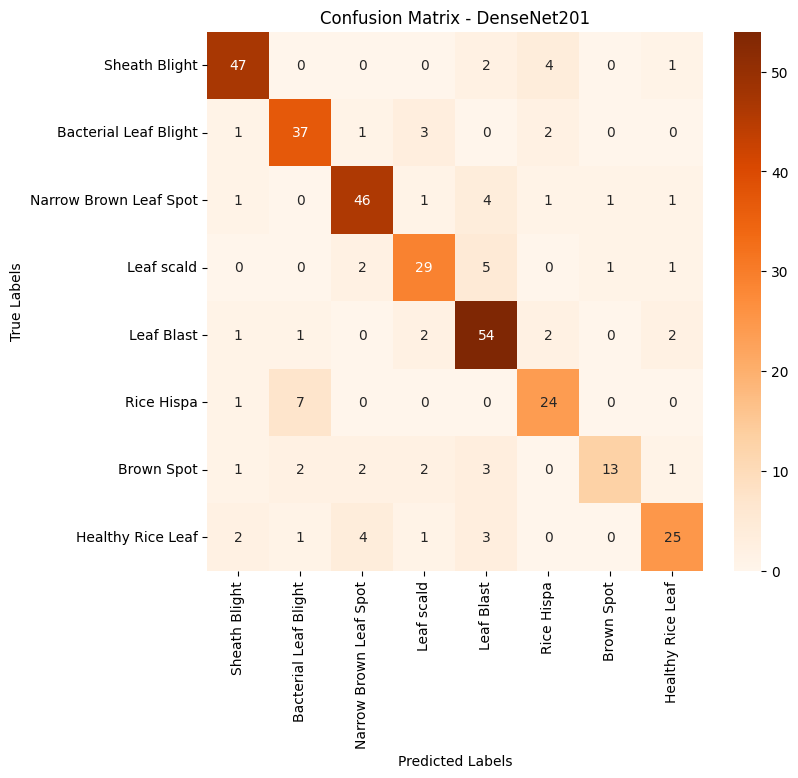

In [29]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary that maps class indices to class names
class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot', 3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names

# Your code to compute the confusion matrix and predicted_labels
# ...

# Convert class indices to class names for both true and predicted labels
true_class_names = [class_names[i] for i in test.classes]
predicted_class_names = [class_names[i] for i in predicted_labels]

# Generate the confusion matrix
resnet_confusion = confusion_matrix(true_class_names, predicted_class_names)

# Plot the confusion matrix as a heatmap with class names
plt.figure(figsize=(8, 7))
sns.heatmap(resnet_confusion, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - DenseNet201')

# Save the confusion matrix as an image (e.g., in PNG format)
plt.savefig('vgg16_confusion_matrix.png', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()

# ResNet50

In [30]:
# # Define the input shape
# input_shape = (224, 224, 3)
# input_tensor = Input(shape=input_shape)

# # Load the pre-trained DenseNet201 model
# ResNet50_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)

# # Freeze the layers in the base model
# for layer in ResNet50_model.layers:
#     layer.trainable = False

# # Add global average pooling layer
# x = GlobalAveragePooling2D()(ResNet50_model.output)

# # Batch Normalization
# x = BatchNormalization()(x)

# # Add a fully connected layer with 512 units
# x = Dense(1024, activation='relu')(x)

# # Add a dropout layer
# x = Dropout(0.2)(x)

# # # Add another fully connected layer with 256 units
# # x = Dense(256, activation='relu')(x)

# # # Add another dropout layer
# # x = Dropout(0.4)(x)

# # Add the output layer with 4 units for classification (adjust as needed)
# output = Dense(8, activation='softmax')(x)

# # Create the model
# model = Model(inputs=input_tensor, outputs=output)

# # Print model summary
# model.summary()

In [31]:
# from tensorflow.keras.utils import plot_model

# # Assuming you already have a model defined and compiled

# # Generate a simplified model summary
# model_summary = []
# model.summary(print_fn=lambda x: model_summary.append(x))
# model_summary = "\n".join(model_summary)

# # Save the model summary as text
# with open("resnet50_model_summary.txt", "w") as text_file:
#     text_file.write(model_summary)

# # Plot the model architecture and save it as an image
# plot_model(model, to_file="resnet50_model_summary.png", show_shapes=True, show_layer_names=False, dpi=1000)

In [32]:
# layers = model.layers
# print(f"The model has {len(layers)} layers")

# print(f"The input shape {model.input}")
# print(f"The output shape {model.output}")

In [33]:
# # Compile the model
# model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(train, validation_data=validation, steps_per_epoch=len(train), epochs=20)

In [34]:
# import pandas as pd

# history_df = pd.DataFrame(history.history)
# history_df.to_csv('resnet50_training_history.csv', index=False)

# Model Evaluation (Accuracy & Loss Plot, Test Results, Classification Report, Confusion Matrix)

In [35]:
# # --------------Model Accuracy-----------#
# # fig1 = plt.gcf()

# # Plot training accuracy with a solid blue line and validation accuracy with a solid red line
# plt.plot(history.history['accuracy'], label='Training Accuracy', color='b', linewidth=2, marker='o')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='r', linewidth=2, marker='o')

# # Add grid lines
# plt.grid(True, linestyle='--', alpha=0.6)

# # Set the title, labels, and legend
# plt.title('Model Accuracy', fontsize=16)
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend(fontsize=12)

# # Customize the x and y axis tick labels
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# # Add a legend with a shadow and a legend title
# plt.legend(fontsize=12, loc='lower right')
# plt.gca().set_title('ResNet50 Model Accuracy', fontsize=16)

# # Customize the X-axis tick locator and formatter
# ax = plt.gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Set integer X-axis tick locator
# ax.set_xticks(np.arange(0, len(history.history['accuracy'])))  # Set ticks at all integer positions

# # Adjust figure size (optional)
# fig = plt.gcf()
# fig.set_size_inches(8, 6)

# # Save the figure in high resolution (e.g., 300 DPI) as a PNG file
# fig.savefig('resnet50_accuracy_plot.png', dpi=1000, bbox_inches='tight')

# # Show or save the plot
# plt.tight_layout()
# plt.show()


# # ------------------------- Model Loss ---------------#

# # Assuming you have already defined the 'history' variable containing accuracy data
# # fig1 = plt.gcf()

# # Plot training accuracy with a solid blue line and validation accuracy with a solid red line
# plt.plot(history.history['loss'], label='Training Loss', color='b', linewidth=2, marker='o')
# plt.plot(history.history['val_loss'], label='Validation Loss', color='r', linewidth=2, marker='o')

# # Add grid lines
# plt.grid(True, linestyle='--', alpha=0.6)

# # Set the title, labels, and legend
# plt.title('Model Loss', fontsize=16)
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Loss', fontsize=12)
# plt.legend(fontsize=12)

# # Customize the x and y axis tick labels
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

# # Add a legend with a shadow and a legend title
# plt.legend(fontsize=12, loc='upper right')
# plt.gca().set_title('ResNet50 Model Loss', fontsize=16)

# # Customize the X-axis tick locator and formatter
# ax = plt.gca()
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Set integer X-axis tick locator
# ax.set_xticks(np.arange(0, len(history.history['loss'])))  # Set ticks at all integer positions

# # Adjust figure size (optional)
# fig = plt.gcf()
# fig.set_size_inches(8, 6)

# # Save the figure in high resolution (e.g., 300 DPI) as a PNG file
# fig.savefig('resnet50_loss_plot.png', dpi=1000, bbox_inches='tight')

# # Show or save the plot
# plt.tight_layout()
# plt.show()

In [36]:
# evaluation1 = model.evaluate(train)
# print(f"ResNet50 Train Accuracy: {evaluation1[1] * 100:.2f}%")

# evaluation2 = model.evaluate(validation)
# print(f"ResNet50 Validation Accuracy: {evaluation2[1] * 100:.2f}%")

# evaluation3 = model.evaluate(test)
# print(f"ResNet50 Test Accuracy: {evaluation3[1] * 100:.2f}%")

In [37]:
# # Your evaluation code here
# train_accuracy = evaluation1[1] * 100
# validation_accuracy = evaluation2[1] * 100
# test_accuracy = evaluation3[1] * 100

# # Create a text image
# plt.figure(figsize=(6, 4))
# plt.text(0.0, 0.7, f"ResNet50 Train Accuracy: {train_accuracy:.2f}%", fontsize=12, ha='center')
# plt.text(0.0, 0.6, f"ResNet50 Validation Accuracy: {validation_accuracy:.2f}%", fontsize=12, ha='center')
# plt.text(0.0, 0.5, f"ResNet50 Test Accuracy: {test_accuracy:.2f}%", fontsize=12, ha='center')
# plt.axis('off')

# # Save the image
# plt.savefig('resnet50_evaluation_results.png', format='png', bbox_inches='tight', dpi=1000)

In [38]:
# from sklearn.metrics import classification_report
# import numpy as np
# import pandas as pd

# # Create a dictionary that maps class indices to class names
# class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot', 3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names

# predicted_vals = model.predict(test, steps=len(test))
# predicted_labels = np.argmax(predicted_vals, axis=1)

# # Convert class indices to class names
# predicted_class_names = [class_names[i] for i in predicted_labels]

# # Create a classification report using class names
# report = classification_report([class_names[i] for i in test.classes], predicted_class_names, output_dict=True)

# # Display the classification report as a DataFrame
# df = pd.DataFrame(report)
# print("ResNet50 Classification Report:")
# print('\n\n')
# print(df)

In [39]:
# from sklearn.metrics import classification_report
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create a dictionary that maps class indices to class names
# class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot', 3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names

# predicted_vals = model.predict(test, steps=len(test))
# predicted_labels = np.argmax(predicted_vals, axis=1)

# # Convert class indices to class names
# predicted_class_names = [class_names[i] for i in predicted_labels]

# # Create a classification report using class names
# report = classification_report([class_names[i] for i in test.classes], predicted_class_names, output_dict=True)
# report_df = pd.DataFrame(report)

# # Create a heatmap from the DataFrame
# plt.figure(figsize=(8, 6))
# cax = plt.matshow(report_df, cmap='YlGn', interpolation='nearest')
# plt.title('ResNet50 Classification Report')

# # Display the values on the heatmap with annotations
# for i in range(report_df.shape[0]):
#     for j in range(report_df.shape[1]):
#         plt.text(j, i, f"{report_df.iloc[i, j]:.2f}", va='center', ha='center', color='k')

# # Add labels for precision, recall, and F1 Score
# plt.text(-1, 0, 'Precision', va='center', ha='center', color='k')
# plt.text(-1, 1, 'Recall', va='center', ha='center', color='k')
# plt.text(-1, 2, 'F1 Score', va='center', ha='center', color='k')
# plt.text(-1, 3, 'Support', va='center', ha='center', color='k')

# plt.colorbar(cax)
# plt.xticks(range(len(report_df.columns)), report_df.columns, rotation=90)
# plt.yticks([])

# # Save the image
# plt.savefig('resnet50_classification_report.png', format='png', bbox_inches='tight', dpi=1000)

In [40]:
# from sklearn.metrics import confusion_matrix
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a dictionary that maps class indices to class names
# class_names = {0: 'Sheath Blight', 1: 'Bacterial Leaf Blight', 2: 'Narrow Brown Leaf Spot', 3: 'Leaf scald', 4: 'Leaf Blast', 5: 'Rice Hispa', 6: 'Brown Spot', 7: 'Healthy Rice Leaf'}  # Add all your class names

# # Your code to compute the confusion matrix and predicted_labels
# # ...

# # Convert class indices to class names for both true and predicted labels
# true_class_names = [class_names[i] for i in test.classes]
# predicted_class_names = [class_names[i] for i in predicted_labels]

# # Generate the confusion matrix
# resnet_confusion = confusion_matrix(true_class_names, predicted_class_names)

# # Plot the confusion matrix as a heatmap with class names
# plt.figure(figsize=(8, 7))
# sns.heatmap(resnet_confusion, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names.values(), yticklabels=class_names.values())
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - ResNet50')

# # Save the confusion matrix as an image (e.g., in PNG format)
# plt.savefig('resnet50_confusion_matrix.png', dpi=1000, bbox_inches='tight')

# # Display the plot
# plt.show()